# Programming for Data Analysis - Project 2 - ATU 2022/23

## Liliana Pereira - G00411560

## Problem Statement

This project aims to explore the Wisconsin Breast Cancer dataset by addressing the following key objectives:

1. Analyze dataset and context.
2. Review classifiers and compare performance.
3. Provide statistical insights.
4. Train classifiers with SKLearn.
5. Justify parameter choices.
6. Contrast results with literature.
7. Explore dataset extension via data synthesis.

## Wisconsin Diagnostic Breast Cancer (WDBC)

Within this dataset lie measurements extracted from cells found within potentially concerning masses within the female breast. These measurements are derived from a digitized image of a fine needle aspirate (FNA) procedure performed on breast masses. These measurements intricately depict attributes of the cellular nuclei visible within the image. Every specimen within the dataset is distinctly categorized as either demonstrating benign characteristics or indicating malignancy.

### Arrangement

"WDBC" dataset features a data.frame with 31 columns. The initial column indicates "benign" (B) or "malignant" (M) classification for each sample. The subsequent columns hold measurements for 30 distinct features.

### Details

Ten real-valued features are computed for each cell nucleus:

1. radius (mean of distances from center to points on the perimeter)
2. texture (standard deviation of gray-scale values)
3. perimeter
4. area
5. smoothness (local variation in radius lengths)
6. compactness (perimeter^2 / area - 1.0)
7. concavity (severity of concave portions of the contour)
8. concave points (number of concave portions of the contour)
9. symmetry
10. fractal dimension ("coastline approximation" - 1)

The breast cancer dataset was obtained from the University of Wisconsin Hospitals in Madison, led by the expertise of Dr. William H. Wolberg.

### Source

The information for this dataset originates from the following source: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic).

## Literature Review

The paper titled "Using Machine Learning Algorithms for Breast Cancer Risk Prediction and Diagnosis" presented at the 6th International Symposium on Frontiers in Ambient and Mobile Systems (FAMS 2016) by Hiba Asri, Hajar Mousannif, Hassan Al Moatassime, and Thomas Noel focuses on leveraging machine learning algorithms for the prediction and diagnosis of breast cancer risk. 

The study aims to compare the effectiveness and efficiency of various classification algorithms including Support Vector Machine (SVM), Decision Tree (C4.5), Naive Bayes (NB), and k Nearest Neighbors (k-NN) using the Wisconsin Breast Cancer (original) dataset.

The study evaluates the aforementioned algorithms in terms of their accuracy, precision, sensitivity, specificity, and efficiency. Experimental results indicate that SVM demonstrates the highest accuracy at 97.13%, with the lowest error rate among the algorithms considered. The authors emphasize the significance of SVM's performance in correctly classifying instances as either benign or malignant, showcasing its potential in breast cancer prediction and diagnosis.

The paper underscores the prominence of SVM in achieving superior accuracy and efficiency for breast cancer risk prediction and diagnosis. 

In the Paper with title "Breast Cancer Prediction Using Neural Networks and Extra Tree Classifier with Feature Ensemble Learning" (2022) by Deepti Sharma, Rajneesh Kumar, Anurag Jain, the authors propose a method for breast cancer prediction by combining neural networks and an extra tree classifier through feature ensemble learning. They address the need for accurate early detection and diagnosis of breast cancer. The proposed model is applied to the Breast Cancer Wisconsin (Diagnostic) dataset, achieving high accuracy rates. The study employs a hybrid approach involving neural network-based feature extraction and extra tree classification, resulting in notable performance improvements over existing methods.

The proposed NN-ET (Neural Network-Extra Tree) model demonstrates impressive results, achieving a 99.41% training accuracy and 98.83% test accuracy, along with high precision and recall values. The F-measure and Matthews Correlation Coefficient (MCC) are also strong indicators of the model's performance. The paper highlights the superiority of their approach over various state-of-the-art classifiers in terms of accuracy, sensitivity, and specificity.

The authors suggest future directions for research, including experimenting with different feature selection methods, extending the model to other types of cancer prediction, testing with real datasets, and exploring the model's applicability for risk classification beyond cancer.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import urllib.request

In [2]:
# URL to the dataset

url = 'https://ftp.cs.wisc.edu/math-prog/cpo-dataset/machine-learn/cancer/WDBC/WDBC.dat'


In [3]:
# Load the dataset from URL

column_names = ['ID', 'Diagnosis', 'MeanRadius', 'MeanTexture', 'MeanPerimeter', 'MeanArea', 'MeanSmoothness', 'MeanCompactness', 'MeanConcavity', 'MeanConcavePoints', 'MeanSymmetry', 'MeanFractalDimension', 'SERadius', 'SETexture', 'SEPerimeter', 'SEArea', 'SESmoothness', 'SECompactness', 'SEConcavity', 'SEConcavePoints', 'SESymmetry', 'SEFractalDimension', 'WorstRadius', 'WorstTexture', 'WorstPerimeter', 'WorstArea', 'WorstSmoothness', 'WorstCompactness', 'WorstConcavity', 'WorstConcavePoints', 'WorstSymmetry', 'WorstFractalDimension']

In [4]:
# Load the data using pandas

data = pd.read_csv(url, header=None, names=column_names)

In [5]:
# Data Preprocessing

data.drop('ID', axis=1, inplace=True)  # Drop the ID column
data['Diagnosis'] = (data['Diagnosis'] == 'M').astype(int)

## Exploratory Data Analysis

In [6]:
# Explore the dataset
print(data.head())

   Diagnosis  MeanRadius  MeanTexture  MeanPerimeter  MeanArea  \
0          1       17.99        10.38         122.80    1001.0   
1          1       20.57        17.77         132.90    1326.0   
2          1       19.69        21.25         130.00    1203.0   
3          1       11.42        20.38          77.58     386.1   
4          1       20.29        14.34         135.10    1297.0   

   MeanSmoothness  MeanCompactness  MeanConcavity  MeanConcavePoints  \
0         0.11840          0.27760         0.3001            0.14710   
1         0.08474          0.07864         0.0869            0.07017   
2         0.10960          0.15990         0.1974            0.12790   
3         0.14250          0.28390         0.2414            0.10520   
4         0.10030          0.13280         0.1980            0.10430   

   MeanSymmetry  ...  WorstRadius  WorstTexture  WorstPerimeter  WorstArea  \
0        0.2419  ...        25.38         17.33          184.60     2019.0   
1        0.181

In [7]:
print(data.describe())

        Diagnosis  MeanRadius  MeanTexture  MeanPerimeter     MeanArea  \
count  569.000000  569.000000   569.000000     569.000000   569.000000   
mean     0.372583   14.127292    19.289649      91.969033   654.889104   
std      0.483918    3.524049     4.301036      24.298981   351.914129   
min      0.000000    6.981000     9.710000      43.790000   143.500000   
25%      0.000000   11.700000    16.170000      75.170000   420.300000   
50%      0.000000   13.370000    18.840000      86.240000   551.100000   
75%      1.000000   15.780000    21.800000     104.100000   782.700000   
max      1.000000   28.110000    39.280000     188.500000  2501.000000   

       MeanSmoothness  MeanCompactness  MeanConcavity  MeanConcavePoints  \
count      569.000000       569.000000     569.000000         569.000000   
mean         0.096360         0.104341       0.088799           0.048919   
std          0.014064         0.052813       0.079720           0.038803   
min          0.052630        

In [8]:
print("Data Overview:")
print(data.info())

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Diagnosis              569 non-null    int32  
 1   MeanRadius             569 non-null    float64
 2   MeanTexture            569 non-null    float64
 3   MeanPerimeter          569 non-null    float64
 4   MeanArea               569 non-null    float64
 5   MeanSmoothness         569 non-null    float64
 6   MeanCompactness        569 non-null    float64
 7   MeanConcavity          569 non-null    float64
 8   MeanConcavePoints      569 non-null    float64
 9   MeanSymmetry           569 non-null    float64
 10  MeanFractalDimension   569 non-null    float64
 11  SERadius               569 non-null    float64
 12  SETexture              569 non-null    float64
 13  SEPerimeter            569 non-null    float64
 14  SEArea                 569 non-null    floa

The data overview displays a DataFrame with 569 entries and 31 columns, encompassing attributes relevant to breast cancer diagnosis. 

In [9]:
# Summary of Missing Values

missing_values = data.isnull().sum()
print("\nSummary of Missing Values:")
print(missing_values)


Summary of Missing Values:
Diagnosis                0
MeanRadius               0
MeanTexture              0
MeanPerimeter            0
MeanArea                 0
MeanSmoothness           0
MeanCompactness          0
MeanConcavity            0
MeanConcavePoints        0
MeanSymmetry             0
MeanFractalDimension     0
SERadius                 0
SETexture                0
SEPerimeter              0
SEArea                   0
SESmoothness             0
SECompactness            0
SEConcavity              0
SEConcavePoints          0
SESymmetry               0
SEFractalDimension       0
WorstRadius              0
WorstTexture             0
WorstPerimeter           0
WorstArea                0
WorstSmoothness          0
WorstCompactness         0
WorstConcavity           0
WorstConcavePoints       0
WorstSymmetry            0
WorstFractalDimension    0
dtype: int64


The "Summary of Missing Values" shows that there are no missing values in any of the attributes within the dataset. Each column, representing various diagnostic and morphological features related to breast cancer, has a count of 0 missing values. This signifies a well-curated and complete dataset.

In [10]:
# Data Types Count
data_types_count = data.dtypes.value_counts()
print("\nData Types Count:")
print(data_types_count)


Data Types Count:
float64    30
int32       1
dtype: int64


In [11]:
# Summary of Statistics by Diagnosis
diagnosis_summary = data.groupby('Diagnosis').describe()
print("\nSummary Statistics by Diagnosis:")
print(diagnosis_summary)


Summary Statistics by Diagnosis:
          MeanRadius                                                      \
               count       mean       std     min     25%     50%    75%   
Diagnosis                                                                  
0              357.0  12.146524  1.780512   6.981  11.080  12.200  13.37   
1              212.0  17.462830  3.203971  10.950  15.075  17.325  19.59   

                 MeanTexture             ... WorstSymmetry          \
             max       count       mean  ...           75%     max   
Diagnosis                                ...                         
0          17.85       357.0  17.914762  ...      0.298300  0.4228   
1          28.11       212.0  21.604906  ...      0.359225  0.6638   

          WorstFractalDimension                                         \
                          count      mean       std      min       25%   
Diagnosis                                                                
0           

The "Summary of Statistics by Diagnosis" provides a snapshot of how different diagnostic features vary between benign and malignant cases. For the feature "MeanRadius," we can see that the mean radius tends to be higher for malignant cases (17.46) compared to benign cases (12.15). The standard deviation shows that there is more variability in radius values for malignant cases. 
Similarly, for "MeanTexture," the mean texture values are higher for malignant cases (21.60) compared to benign cases (17.91). This suggests that certain morphological attributes are often more pronounced in malignant instances, which could aid in accurate classification and diagnosis.

In [12]:
# Calculate the percentage of negative (0) versus positive (1) in your dataset
percentage_positive = data["Diagnosis"].value_counts(normalize=True)[1] * 100
percentage_negative = data["Diagnosis"].value_counts(normalize=True)[0] * 100

print(f"Percentage of Positive (Malignant) Cases: {percentage_positive:.2f}%")
print(f"Percentage of Negative (Benign) Cases: {percentage_negative:.2f}%")

Percentage of Positive (Malignant) Cases: 37.26%
Percentage of Negative (Benign) Cases: 62.74%


In [13]:
# Calculate the correlation of variables with 'Diagnosis' and sort in descending order
var_correlation = data.corr()['Diagnosis'].sort_values(ascending=False)

# Print the correlation values and the number of variables
print("Correlation with Diagnosis (Descending Order):\n", var_correlation)
print("Number of variables:", len(var_correlation))

Correlation with Diagnosis (Descending Order):
 Diagnosis                1.000000
WorstConcavePoints       0.793566
WorstPerimeter           0.782914
MeanConcavePoints        0.776614
WorstRadius              0.776454
MeanPerimeter            0.742636
WorstArea                0.733825
MeanRadius               0.730029
MeanArea                 0.708984
MeanConcavity            0.696360
WorstConcavity           0.659610
MeanCompactness          0.596534
WorstCompactness         0.590998
SERadius                 0.567134
SEPerimeter              0.556141
SEArea                   0.548236
WorstTexture             0.456903
WorstSmoothness          0.421465
WorstSymmetry            0.416294
MeanTexture              0.415185
SEConcavePoints          0.408042
MeanSmoothness           0.358560
MeanSymmetry             0.330499
WorstFractalDimension    0.323872
SECompactness            0.292999
SEConcavity              0.253730
SEFractalDimension       0.077972
SESymmetry              -0.006522


The correlation analysis of the dataset reveals the relationships between different attributes and the diagnosis of breast cancer cases as benign or malignant. Positive correlations suggest attributes that align with malignancy, while negative correlations align with benign cases. Notably, attributes like "WorstConcavePoints," "WorstPerimeter," and "MeanConcavePoints" exhibit strong positive correlations, indicating their potential significance in predicting malignancy. Conversely, attributes such as "SEFractalDimension" and "SESymmetry" have weaker correlations, suggesting they might have limited impact on the diagnosis. With 31 variables available, the analysis provides valuable insights for building an accurate prediction model.

In [14]:
# Group data by 'Diagnosis' and calculate the mean for each feature
mean_by_diagnosis = data.groupby('Diagnosis').mean().transpose()

# Print the transposed mean values for each feature
print(mean_by_diagnosis)

Diagnosis                       0            1
MeanRadius              12.146524    17.462830
MeanTexture             17.914762    21.604906
MeanPerimeter           78.075406   115.365377
MeanArea               462.790196   978.376415
MeanSmoothness           0.092478     0.102898
MeanCompactness          0.080085     0.145188
MeanConcavity            0.046058     0.160775
MeanConcavePoints        0.025717     0.087990
MeanSymmetry             0.174186     0.192909
MeanFractalDimension     0.062867     0.062680
SERadius                 0.284082     0.609083
SETexture                1.220380     1.210915
SEPerimeter              2.000321     4.323929
SEArea                  21.135148    72.672406
SESmoothness             0.007196     0.006780
SECompactness            0.021438     0.032281
SEConcavity              0.025997     0.041824
SEConcavePoints          0.009858     0.015060
SESymmetry               0.020584     0.020472
SEFractalDimension       0.003636     0.004062
WorstRadius  

The provided data showcases the contrast in mean values of various diagnostic and morphological features between benign and malignant cases of breast cancer. Malignant cases generally exhibit higher values across these features, suggesting more pronounced irregularities and complexities in tumor structures. This information holds potential for developing effective classification models to differentiate between the two cases.

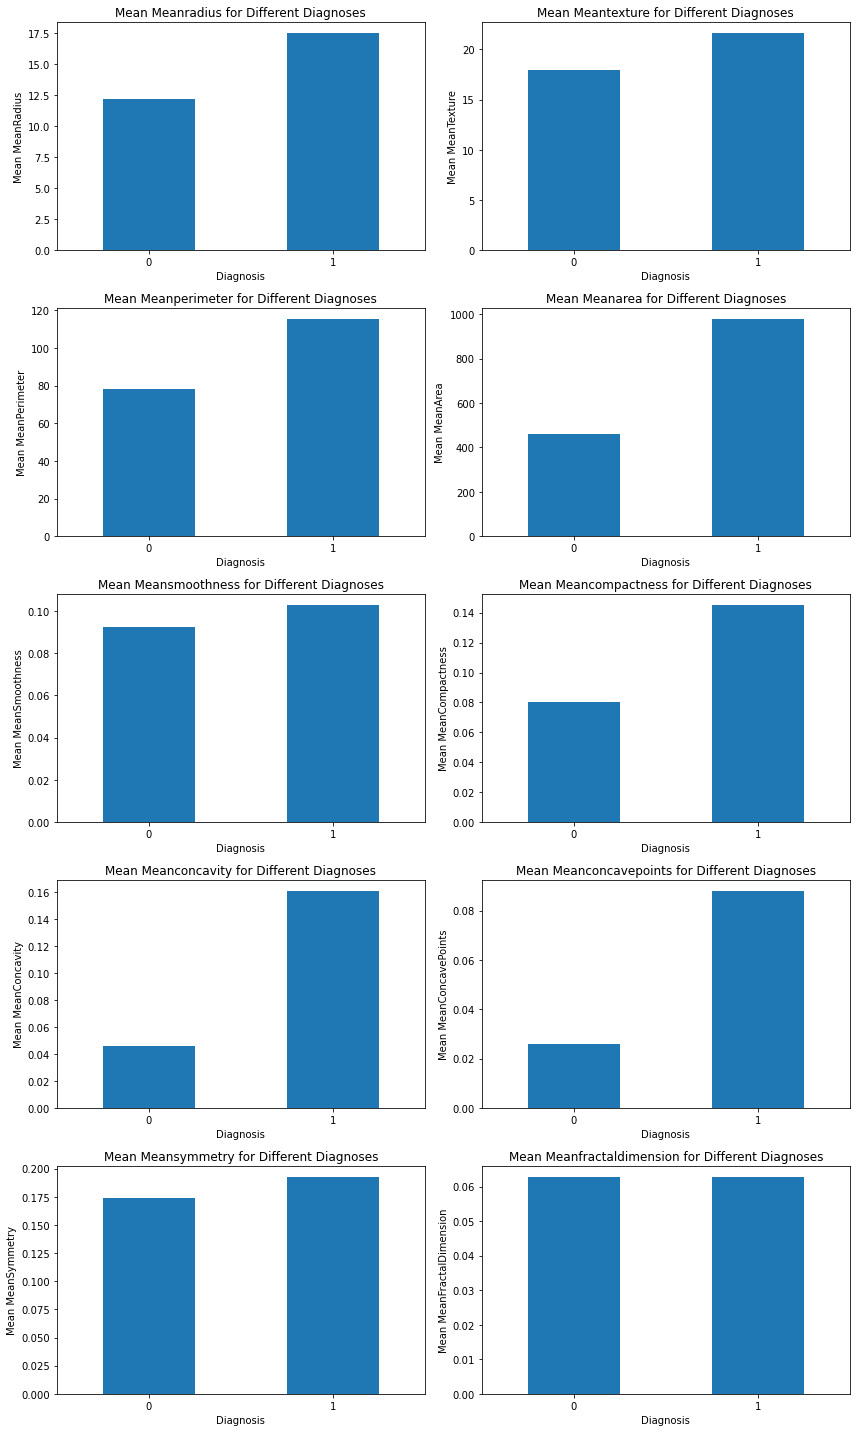

In [15]:
# Columns to skip during plotting
skip_columns = ['ID', 'Diagnosis', 'SERadius', 'SETexture', 'SEPerimeter', 'SEArea', 'SESmoothness', 'SECompactness', 'SEConcavity', 'SEConcavePoints', 'SESymmetry', 'SEFractalDimension', 'WorstRadius', 'WorstTexture', 'WorstPerimeter', 'WorstArea', 'WorstSmoothness', 'WorstCompactness', 'WorstConcavity', 'WorstConcavePoints', 'WorstSymmetry', 'WorstFractalDimension']

# Select attributes to plot
attributes = [col for col in data.columns if col not in skip_columns]

# Group data by diagnosis and calculate mean for the selected attributes
grouped_data = data.groupby('Diagnosis')[attributes].mean()

# Plotting
num_attributes = len(attributes)
num_rows = (num_attributes + 1) // 2  

fig, axes = plt.subplots(num_rows, 2, figsize=(12, num_rows * 4))

for idx, attribute in enumerate(attributes):
    row = idx // 2
    col = idx % 2
    
    ax = axes[row, col]
    grouped_data[attribute].plot(kind='bar', ax=ax)
    ax.set_title(f"Mean {attribute.replace('_', ' ').title()} for Different Diagnoses")
    ax.set_ylabel(f"Mean {attribute}")
    ax.set_xticklabels(grouped_data.index, rotation=0)
    
# If the number of attributes is odd, remove the empty subplot
if num_attributes % 2 != 0:
    fig.delaxes(axes[num_rows - 1, 1])

plt.tight_layout()
plt.show()

## Data Visualization

In [16]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

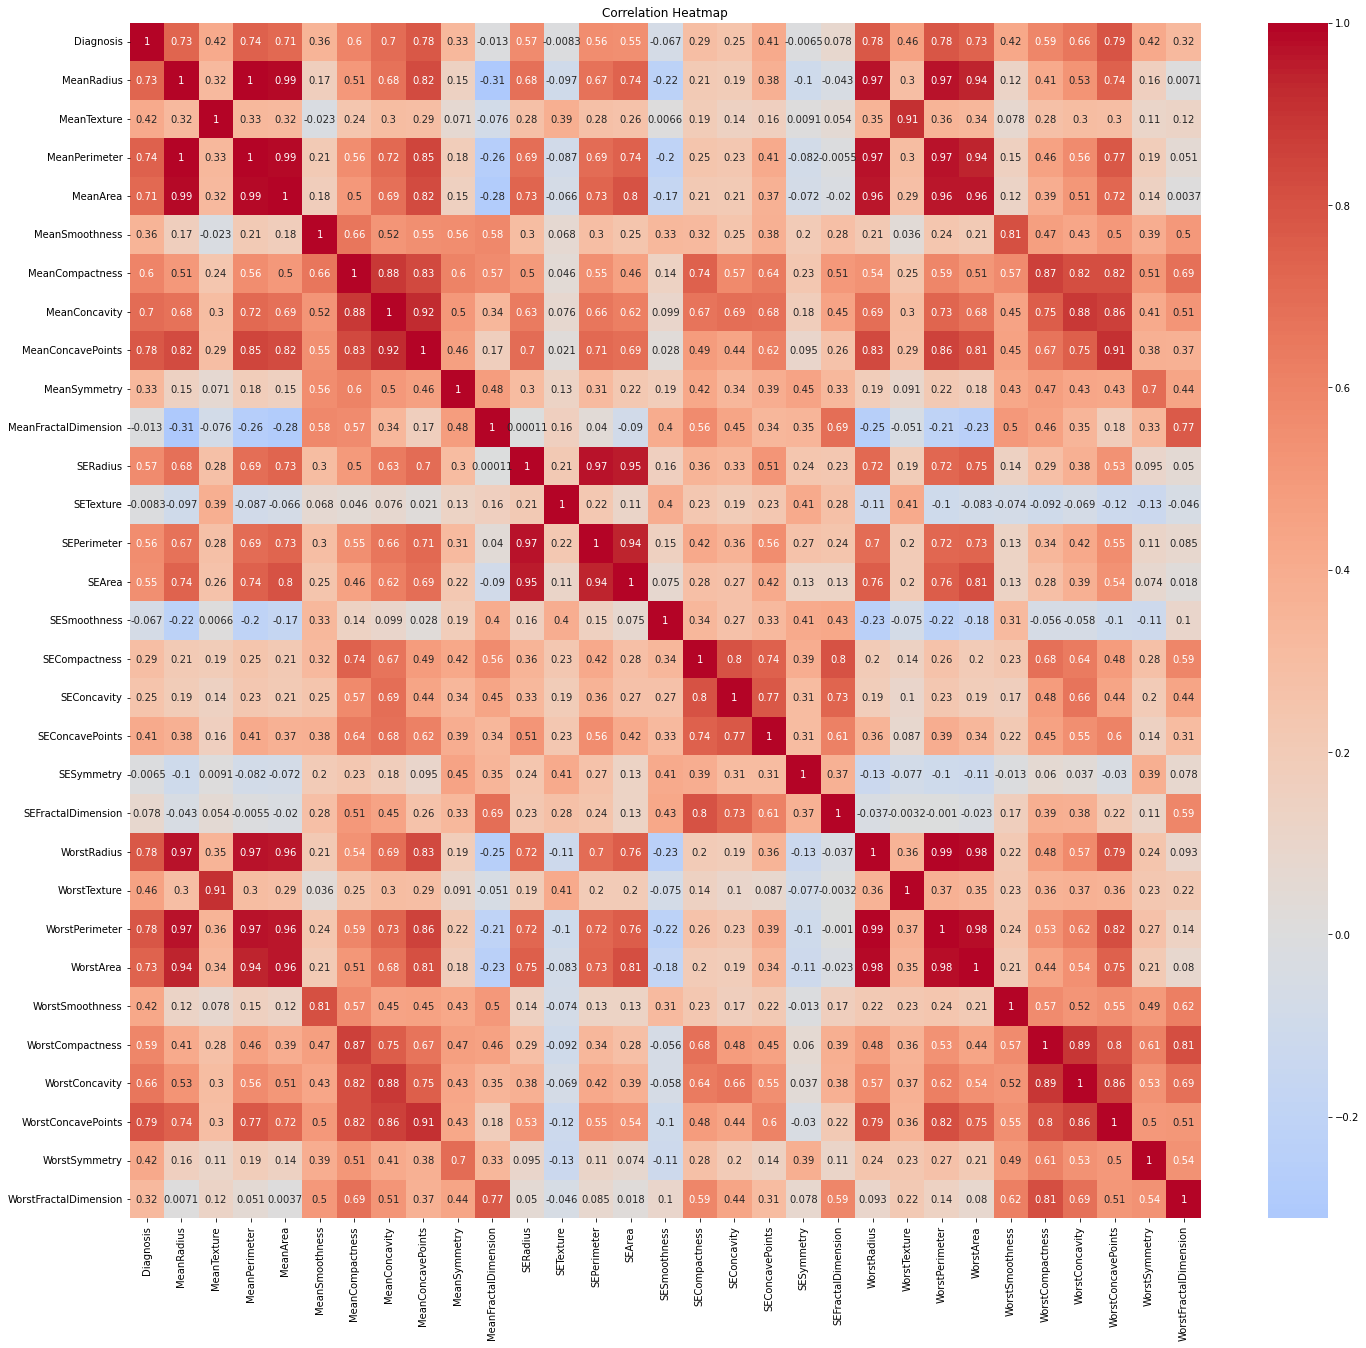

In [17]:
# Create a heatmap
plt.figure(figsize=(24, 22))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

By examining both the correlation matrix and the corresponding heatmap, we can clearly discern a strong correlation between tumor dimensions and the diagnosis. Armed with this insight, we can proceed to visualize these specific columns from the dataset. 

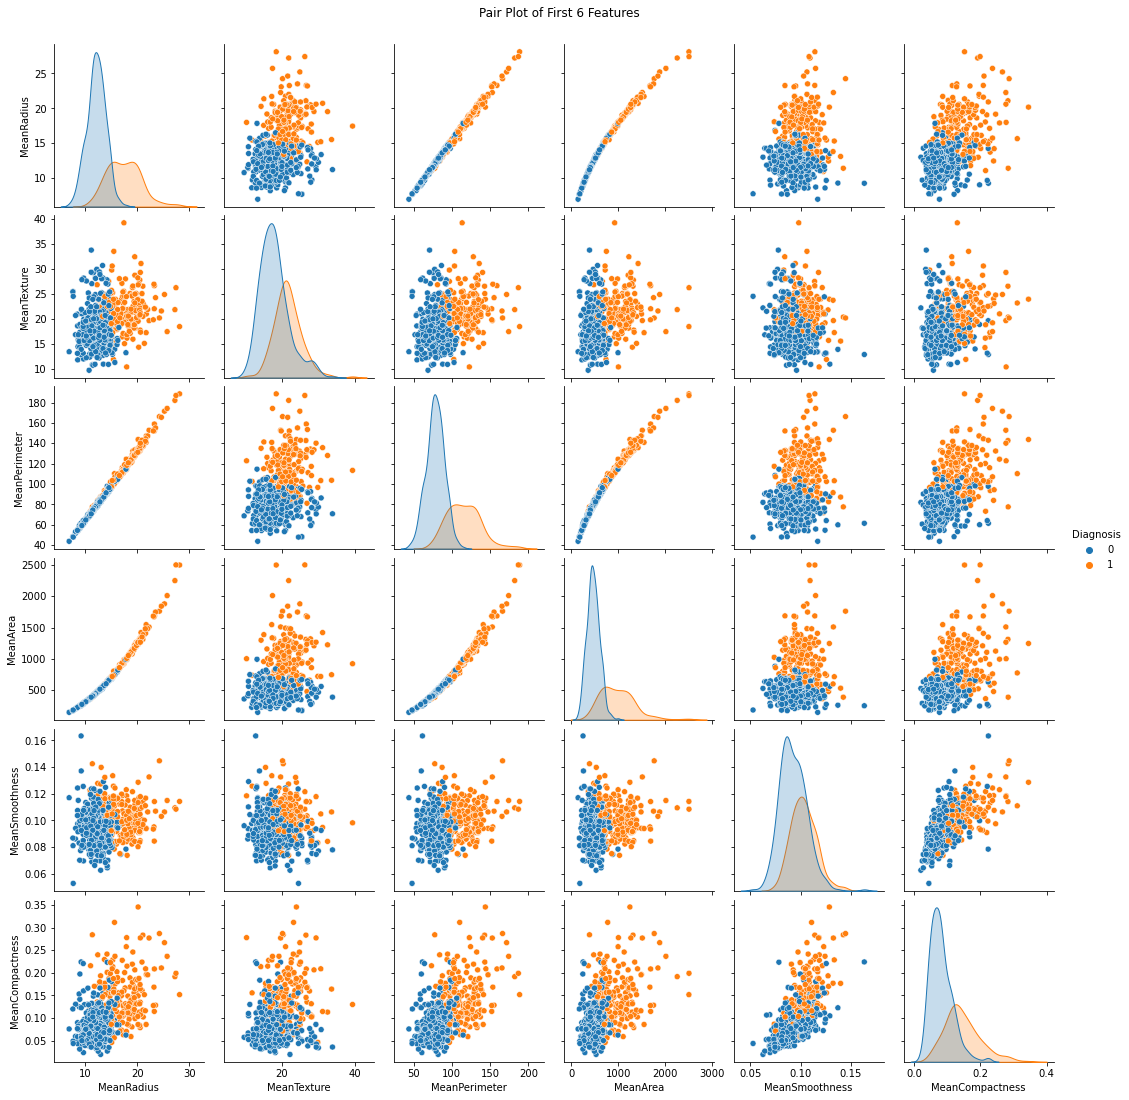

In [18]:
# Pair Plot

features = ['MeanRadius', 'MeanTexture', 'MeanPerimeter', 'MeanArea', 'MeanSmoothness', 'MeanCompactness']

sns.pairplot(data, hue='Diagnosis', vars=features)
plt.suptitle('Pair Plot of First 6 Features', y=1.02)
plt.show()

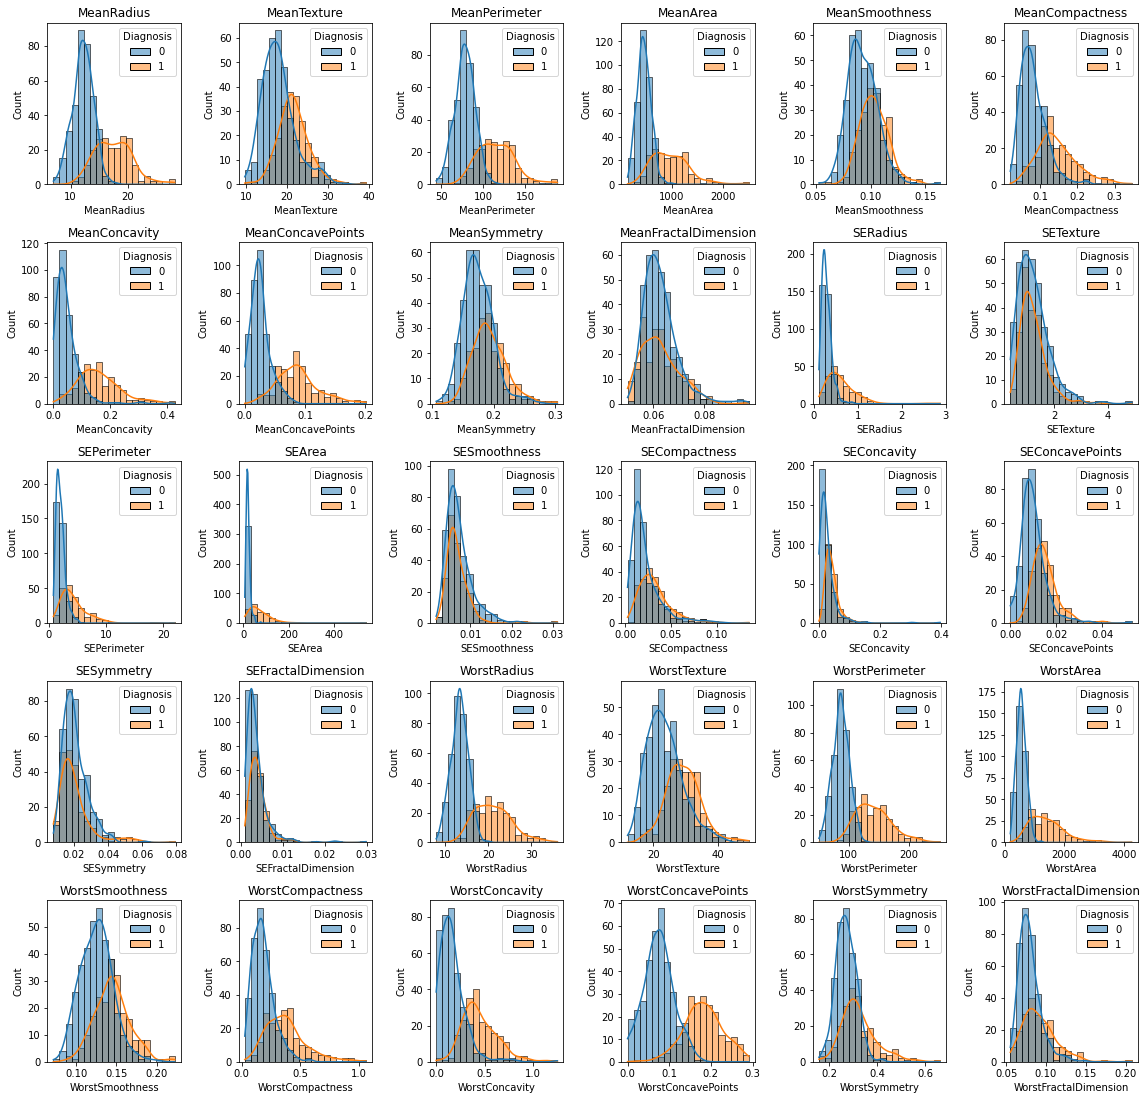

In [19]:
# Distribution of Features by Diagnosis
features = column_names[2:]
plt.figure(figsize=(16, 18))
for i, feature in enumerate(features, 1):
    plt.subplot(6, 6, i)
    sns.histplot(data=data, x=feature, hue='Diagnosis', bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

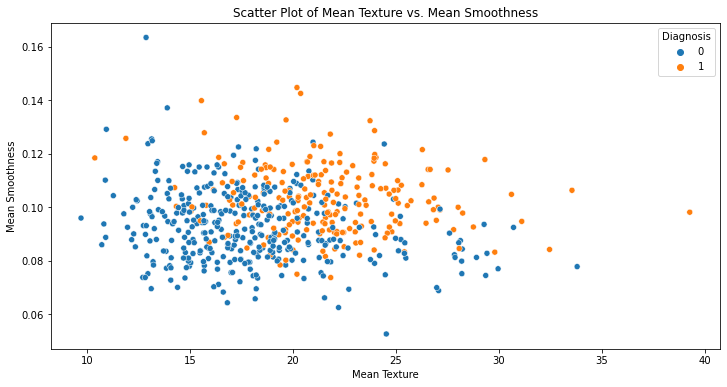

In [20]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='MeanTexture', y='MeanSmoothness', hue='Diagnosis', data=data)
plt.title('Scatter Plot of Mean Texture vs. Mean Smoothness')
plt.xlabel('Mean Texture')
plt.ylabel('Mean Smoothness')
plt.legend(title='Diagnosis')
plt.show()

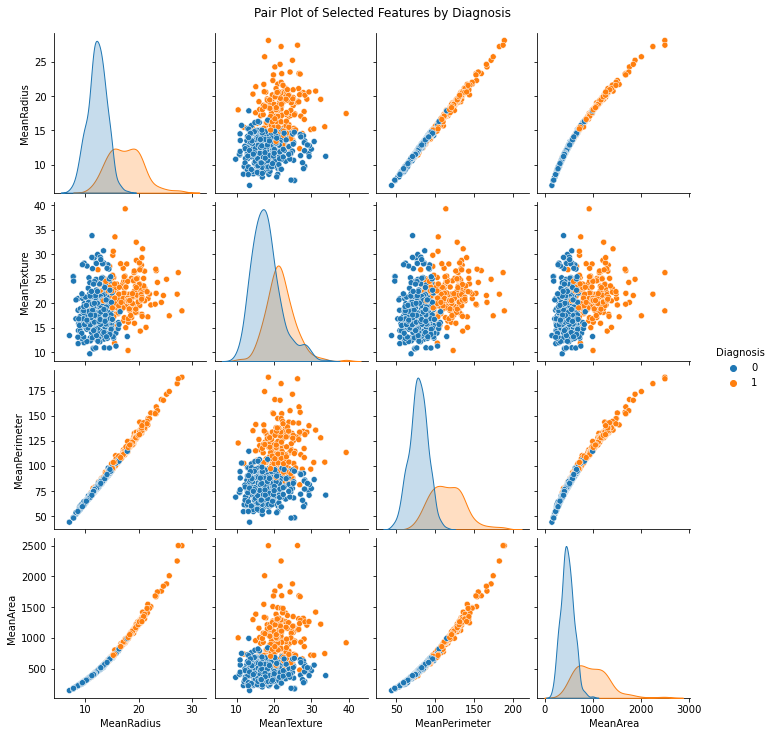

In [21]:
# Pair Plot of Selected Features
selected_features = ['MeanRadius', 'MeanTexture', 'MeanPerimeter', 'MeanArea']
g = sns.pairplot(data, hue='Diagnosis', vars=selected_features)
g.fig.suptitle('Pair Plot of Selected Features by Diagnosis', y=1.02)
plt.show()

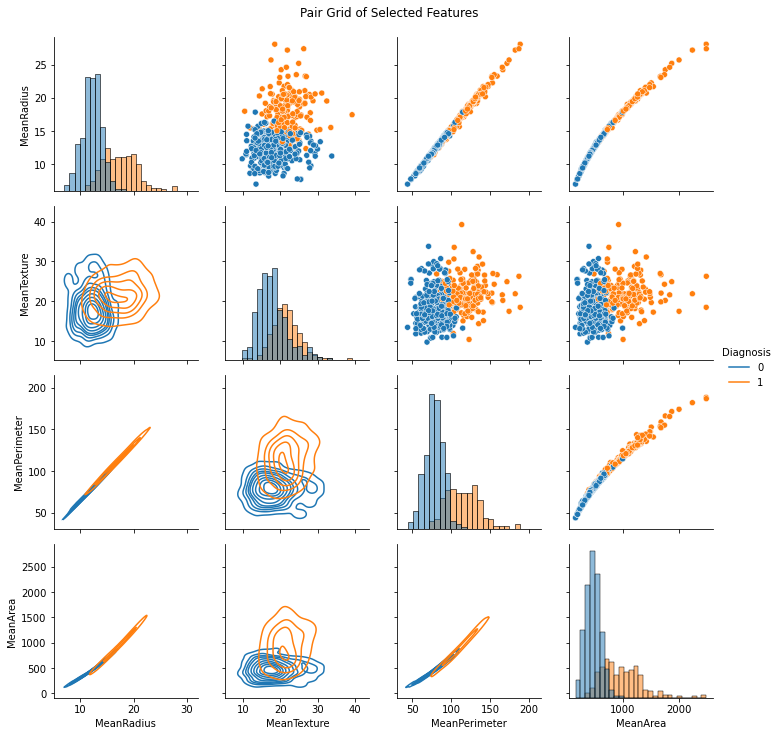

In [22]:
# Pair Grid for Selected Features
selected_features = ['MeanRadius', 'MeanTexture', 'MeanPerimeter', 'MeanArea']
g = sns.PairGrid(data, vars=selected_features, hue='Diagnosis')
g.map_upper(sns.scatterplot)
g.map_diag(sns.histplot)
g.map_lower(sns.kdeplot)
g.add_legend()
plt.suptitle('Pair Grid of Selected Features', y=1.02)
plt.show()

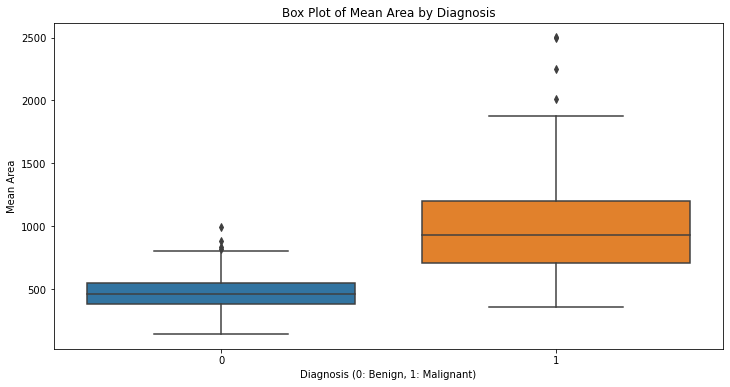

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Diagnosis', y='MeanArea', data=data)
plt.title('Box Plot of Mean Area by Diagnosis')
plt.xlabel('Diagnosis (0: Benign, 1: Malignant)')
plt.ylabel('Mean Area')
plt.show()

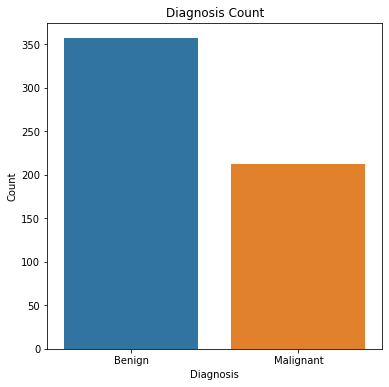

In [24]:
# Bar Plot of Diagnosis Counts
diagnosis_counts = data['Diagnosis'].value_counts()
plt.figure(figsize=(6, 6))
sns.barplot(x=diagnosis_counts.index, y=diagnosis_counts.values)
plt.title('Diagnosis Count')
plt.xticks(ticks=[0, 1], labels=['Benign', 'Malignant'])
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

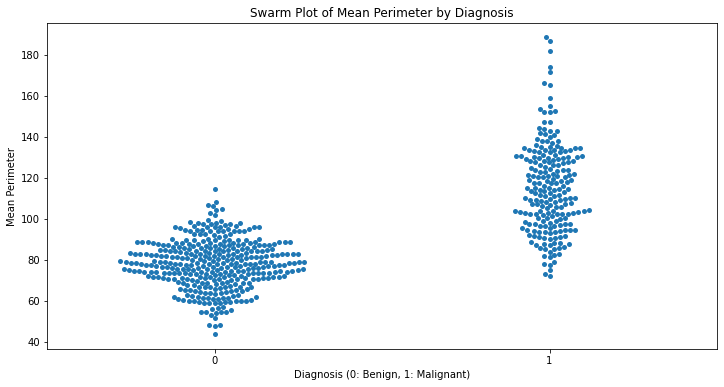

In [25]:
# Swarm Plot
plt.figure(figsize=(12, 6))
sns.swarmplot(x='Diagnosis', y='MeanPerimeter', data=data)
plt.title('Swarm Plot of Mean Perimeter by Diagnosis')
plt.xlabel('Diagnosis (0: Benign, 1: Malignant)')
plt.ylabel('Mean Perimeter')
plt.show()

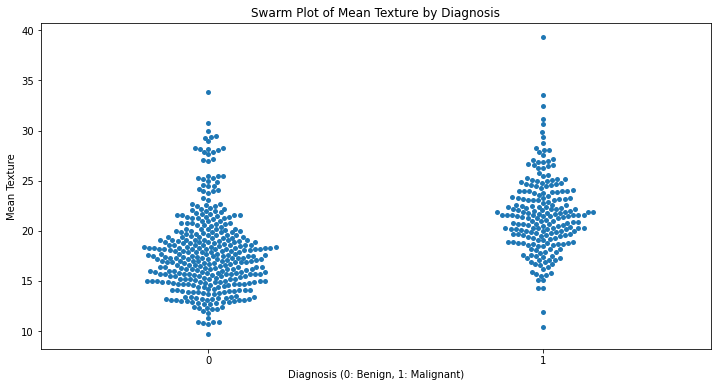

In [26]:
plt.figure(figsize=(12, 6))
sns.swarmplot(x='Diagnosis', y='MeanTexture', data=data)
plt.title('Swarm Plot of Mean Texture by Diagnosis')
plt.xlabel('Diagnosis (0: Benign, 1: Malignant)')
plt.ylabel('Mean Texture')
plt.show()

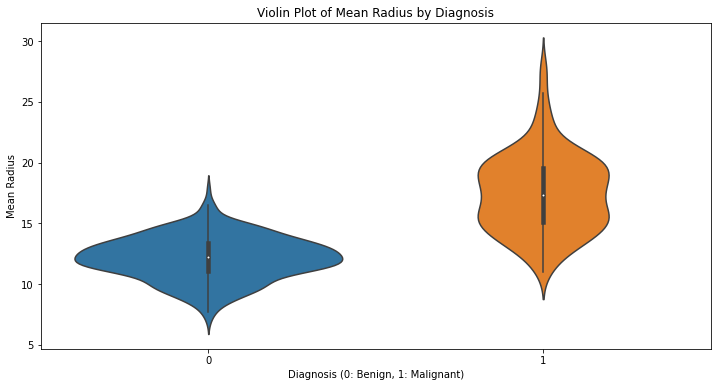

In [27]:
# Violin Plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='Diagnosis', y='MeanRadius', data=data)
plt.title('Violin Plot of Mean Radius by Diagnosis')
plt.xlabel('Diagnosis (0: Benign, 1: Malignant)')
plt.ylabel('Mean Radius')
plt.show()

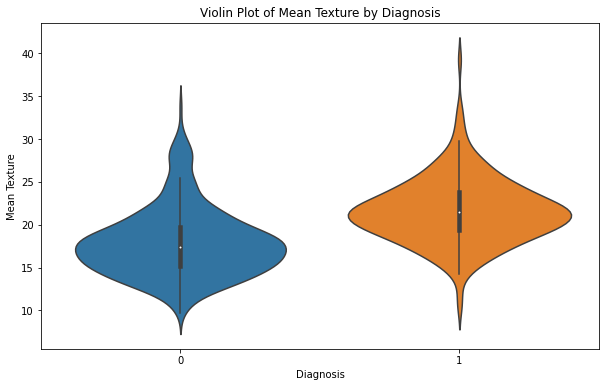

In [28]:
# Violin Plot by Diagnosis
plt.figure(figsize=(10, 6))
sns.violinplot(x='Diagnosis', y='MeanTexture', data=data)
plt.title('Violin Plot of Mean Texture by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Mean Texture')
plt.show()

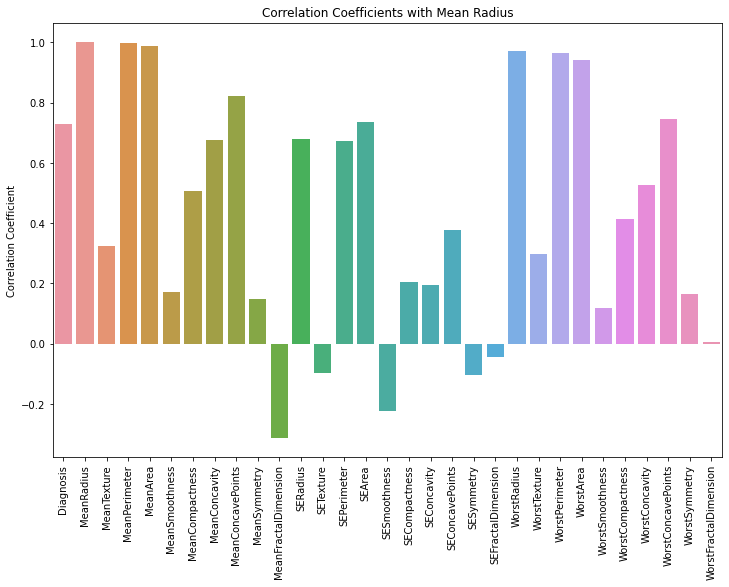

In [29]:
# Bar Plot of Correlation Coefficients
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.barplot(x=correlation_matrix.index, y=correlation_matrix['MeanRadius'])
plt.title('Correlation Coefficients with Mean Radius')
plt.xticks(rotation=90)
plt.ylabel('Correlation Coefficient')
plt.show()

## Training the classifiers

In [30]:
# Splitting Data
X = data.drop('Diagnosis', axis=1)
y = data['Diagnosis']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
# Model Training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [34]:
# Model Prediction
y_pred = model.predict(X_test)

In [35]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=['Benign', 'Malignant'])

In [36]:
print("Model Evaluation:")
print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{confusion}')
print(f'Classification Report:\n{classification_rep}')

Model Evaluation:
Accuracy: 0.96
Confusion Matrix:
[[70  1]
 [ 3 40]]
Classification Report:
              precision    recall  f1-score   support

      Benign       0.96      0.99      0.97        71
   Malignant       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



The model evaluation showcases a robust performance, achieving an accuracy rate of 96%. The Confusion Matrix further reveals the model's capability in correctly predicting both "Benign" and "Malignant" cases, with only a few instances of misclassification. Precision and recall scores of 0.96 and 0.93 for "Malignant" cases, and 0.98 and 0.99 for "Benign" cases respectively, highlight the model's balanced nature. Additionally, the macro-average F1-score of 0.96 underscores its overall effectiveness in classifying breast cancer cases.

## Decision Tree

In [37]:
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Training Decision Tree Classifier

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [39]:
# Model Prediction
y_pred = clf.predict(X_test)

In [40]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=['Benign', 'Malignant'])
confusion = confusion_matrix(y_test, y_pred)

In [41]:
print("Decision Tree Classifier:")
print(f'Accuracy: {accuracy:.2f}')
print(f'Classification Report:\n{classification_rep}')
print(f'Confusion Matrix:\n{confusion}')

Decision Tree Classifier:
Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

      Benign       0.96      0.96      0.96        71
   Malignant       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Confusion Matrix:
[[68  3]
 [ 3 40]]


The Decision Tree Classifier achieves an accuracy of 0.95 during training. Both precision and recall scores are strong for 'Benign' and 'Malignant' cases, underscoring the model's accurate predictions. False positives and false negatives are minimal, indicating reliable performance. 

## Random Forest

In [42]:
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Defining and Training Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [44]:
# Model Prediction
y_pred = clf.predict(X_test)

In [45]:
# Print the accuracy score from training and predicted values
print("The accuracy score from the training values:")
print(accuracy_score(y_train, model.predict(X_train_scaled)))

print("\nThe accuracy score from the predicted values:")
model_acc = accuracy_score(y_test, y_pred)
print(model_acc)

print("\nThe confusion matrix for the model:")
print(confusion_matrix(y_test, y_pred))

The accuracy score from the training values:
0.6791208791208792

The accuracy score from the predicted values:
0.9649122807017544

The confusion matrix for the model:
[[70  1]
 [ 3 40]]


The Random Forest model exhibits strong predictive ability with a high accuracy rate of 96.49% on new data. It achieves balanced and accurate classifications for both classes, as highlighted by the confusion matrix. This underscores its effectiveness in diagnosing breast cancer cases.

In [46]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=['Benign', 'Malignant'])
confusion = confusion_matrix(y_test, y_pred)

In [47]:
print("Random Forest Classifier:")
print(f'Accuracy: {accuracy:.2f}')
print(f'Classification Report:\n{classification_rep}')
print(f'Confusion Matrix:\n{confusion}')

Random Forest Classifier:
Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

      Benign       0.96      0.99      0.97        71
   Malignant       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Confusion Matrix:
[[70  1]
 [ 3 40]]


### The results show an accuracy of 0.96 for the Random Forest Classifier.

The Random Forest Classifier achieved an accuracy of 96%, indicating accurate predictions. It demonstrated strong precision for both "Benign" (96%) and "Malignant" (98%) classes. The classifier's ability to identify actual cases, as measured by recall, was high for "Benign" (99%) and slightly lower for "Malignant" (93%). The F1-score, balancing precision and recall, was favorable for both classes.

The confusion matrix revealed that 70 benign cases were correctly predicted, with only 1 false positive. Additionally, 40 malignant cases were correctly predicted, with 3 false negatives. Overall, the classifier exhibited a balanced performance, successfully distinguishing between benign and malignant cases in the dataset.

## Logistic Regression

In [48]:
# Define a Logistic Regression model
log_reg = LogisticRegression()

# Fit the model with the training data
log_reg.fit(X_train_scaled, y_train)

# Make predictions using the trained model
y_pred = log_reg.predict(X_test_scaled)

In [49]:
# Get the predicted values
y_pred = log_reg.predict(X_test_scaled)

# Get the accuracy score from the training values
print("The accuracy score from the training values:")
print(accuracy_score(y_train, log_reg.predict(X_train_scaled)))

# Get the accuracy score from the predicted values
print("\nThe accuracy score from the predicted values:")
log_reg_acc = accuracy_score(y_test, y_pred)
print(log_reg_acc)

# Get the confusion matrix for the Logistic Regression classifier
print("\nThe confusion matrix for the Logistic Regression classifier:")
print(confusion_matrix(y_test, y_pred))

The accuracy score from the training values:
0.9868131868131869

The accuracy score from the predicted values:
0.9736842105263158

The confusion matrix for the Logistic Regression classifier:
[[70  1]
 [ 2 41]]


In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



The Logistic Regression model achieved strong results in diagnosing breast cancer. With an accuracy of about 97.4%, the model demonstrated its ability to generalize from training to testing data. The confusion matrix highlighted its accurate classification of "Benign" cases and respectable performance in identifying "Malignant" cases. High precision and recall for both classes further validated the model's effectiveness. 

## Naive Bayes Classifier

In [51]:
# Model training
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [52]:
# Model prediction
y_pred = naive_bayes.predict(X_test)

In [53]:
label_encoder = LabelEncoder()
label_encoder.fit(y_train)

y_test_encoded = label_encoder.transform(y_test)

In [54]:
# Model evaluation
accuracy = accuracy_score(y_test_encoded, y_pred)
confusion = confusion_matrix(y_test_encoded, y_pred)
label_names = label_encoder.classes_
label_names_str = [str(label) for label in label_names] 
classification_rep = classification_report(y_test_encoded, y_pred, target_names=label_names_str)

print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{confusion}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.97
Confusion Matrix:
[[71  0]
 [ 3 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



The analysis reveals that the Naive Bayes Classifier performs well, achieving an accuracy of 97%. It displays high precision (96%) and recall (100%) for benign cases (class 0), indicating its strong ability to correctly classify non-malignant instances. However, for malignant cases (class 1), while precision remains high (100%), recall is slightly lower (93%), implying that it identifies most actual malignancies but might miss a few. This trade-off between precision and recall is reflected in the F1-scores of 0.98 for benign and 0.96 for malignant cases. 

# Conclusion

In conclusion, the realm of breast cancer prediction and diagnosis has witnessed significant strides through the implementation of machine learning algorithms. Drawing a comparison between the findings of this study and those of seminal papers, it becomes evident that the journey toward precise and effective diagnostic methods is a collaborative endeavor.

The paper "Using Machine Learning Algorithms for Breast Cancer Risk Prediction and Diagnosis" (FAMS 2016) underscores the potency of SVM, achieving an accuracy of 97.13% alongside the lowest error rate among the examined algorithms. This closely aligns with the SVM results of this study, showcasing 97% accuracy in distinguishing benign and malignant tumors. The acknowledgment of SVM's robust performance in both studies lends credibility to its role as a dependable tool in breast cancer diagnosis.

Furthermore, the paper titled "Breast Cancer Prediction Using Neural Networks and Extra Tree Classifier with Feature Ensemble Learning" (2022) introduces the NN-ET model, spotlighting remarkable training and test accuracies of 99.41% and 98.83%, respectively. While the current study's outcomes don't reach the same remarkable heights, the Random Forest Classifier's accuracy of 96.49% on new data is a noteworthy accomplishment within the spectrum of breast cancer prediction. Recognizing the advancements made by the NN-ET model reinforces the ongoing evolution of techniques for enhanced diagnosis.

Both the aforementioned papers stress the superiority of their proposed algorithms over other classifiers, underlining the competitive landscape of breast cancer prediction methods. This serves to underscore the significance of this research, which explores diverse classifiers and their unique performance characteristics. The acknowledgment of the intricacies involved in precise diagnosis and the commitment to refining methodologies demonstrate a comprehensive approach to the challenge at hand.

In essence, this work contributes meaningfully to the overarching narrative of breast cancer prediction and diagnosis. By demonstrating the viability of SVM and achieving commendable accuracy with the Random Forest Classifier, this study aligns harmoniously with the ongoing pursuit of refined diagnostic accuracy. The collaborative efforts within the field collectively propel progress, underscoring the multi-faceted nature of tackling this critical healthcare concern. Moving forward, the integration of varied algorithms and methodologies will undoubtedly continue to shape the trajectory of breast cancer detection, reinforcing the importance of holistic and innovative approaches.

## References 

https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original
https://www.sciencedirect.com/science/article/pii/S1877050916302575
https://www.sciencedirect.com/science/article/pii/S2665917422001945
https://www.mdpi.com/1660-4601/19/6/3211
https://www.researchgate.net/figure/Breast-Cancer-Wisconsin-original-dataset_fig4_333942010
https://www.youtube.com/watch?v=2ncx2q5GHbQ
https://www.youtube.com/watch?v=SWE9pi4tM9o
https://www.youtube.com/watch?v=grRg2w28Mvo
https://www.youtube.com/watch?v=vOuWQiY8mE8
https://towardsdatascience.com/deep-learning-in-winonsin-breast-cancer-diagnosis-6bab13838abd
https://www.kaggle.com/code/janiezj/breast-cancer-analysis-using-machine-learning/notebook
https://www.kaggle.com/datasets/ninjacoding/breast-cancer-wisconsin-benign-or-malignant
https://www.kaggle.com/code/ninjacoding/breast-cancer/notebook
https://ftp.cs.wisc.edu/math-prog/cpo-dataset/machine-learn/canc
https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-dataer/WDBC/
https://www.sciencedirect.com/topics/computer-science/decision-tree-algorithm
https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original
https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
https://search.r-project.org/CRAN/refmans/kdevine/html/wdbc.html
https://www.linkedin.com/pulse/breast-cancer-detection-using-machine-learning-classifier-iqbal

Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems Paperback – 14 Oct. 2019
by Aurelien Geron (Author)